<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Projeto_ML01_(Minerando_Dados).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Classificador de Renda Anual
---


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



Ao contrário do que ocorre no Brasil, nos Estados Unidos a faixa salarial é definida anualmente. Isso significa que o importante não é o ganho mensal, mas sim anual. Isso pode até parecer um pouco estranho em relação à nossa cultura, porém é uma equivalência bem simples, alguém que ganharia, por exemplo, 50 (cinquenta) mil reais por ano nos padrões americanos, seria alguém que, segundo o padrão brasileiro, ganharia o valor de aproximadamente 4.166 (quatro mil cento e sessenta e seis) reais por mês.



![img](https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-de-poupanca_114360-1516.jpg)





## Objetivo
Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 (cinquenta) mil dólares por ano.

## Habilidade Avaliadas
* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

## Sobre o Projeto
O projeto foi proposto pelo [Minerando Dados](https://minerandodados.com.br/) através do curso [Data Science do Zero](https://minerandodados.com.br/curso-de-data-science/) como parte da composição do portfólio.

Também devo ressaltar que foi inspirado pelo trabalho da monitora do curso [Karinne Cristina](https://github.com/karinnecristina), Cientista de Dados da Refinaria de Dados.

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI e pode ser visualizado [aqui](https://archive.ics.uci.edu/ml/datasets/Adult).

## Checklist

1. Conhecendo a Base de Dados
2. Visualizando Distribuições
3. Substituindo os Valores Faltantes
4. Selecionando Features Importantes
5. Treinando Modelos de Machine Learning
6. Fazendo Tuning do Modelo
7. Preparando a Versão Final do Modelo
8. Persistindo o Modelo em Disco

# 1. Conhecendo a Base de Dados

Antes de tudo, até mesmo de carregar a base de dados, vamos conhecer cada feature presente:

``age``: Idade.

``workclass``: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

``fnlwgt``: Final weight é o peso final

``education``: Níveis de Escolaridade.

``education-num``: Código do Nível de Escolaridade.

``marital-status``: Estado Civil.

``occupation``: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

``relationship``: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

``race``: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

``sex``: Sexo(Feminino, Masculino).

``capital-gain``: Ganho de Capital.

``capital-loss``: Perda de Capital.

``hours-per-week``: Horas de trabalho por Semana.

``native-country``: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc).

``income``: Renda em dólar, por ano.

**Importando as bibliotecas necessárias**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
import pickle
from joblib import dump
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Carregando a base de dados**

Na leitura da base de dados, o `na_values= '?'` é para o pandas entender que os ``?`` na base de dados são valores faltantes.

In [ ]:
df=pd.read_csv('/content/adult.data',na_values='?')

**Primeiras 5 linhas**

In [ ]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


**Últimas 5 linhas**

In [ ]:
df.tail()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


**Verificando valores nulos**

Aqui há algo muito importante a saber:
Analisar sua base de dados é primordial para o sucesso do seu trabalho como cientista ou analista, contudo antes mesmo de carregá-la em um notebook ou colab, por exemplo, é interessante ver seu conteúdo raiz.

Por que isso? Simples! Nesse caso em especifico, se na leitura dos dados não tivesse sido passado que os valores ``?`` deveriam ser tratados como valores nulos, não encontrariamos a quantidade significativa de valores nulos abaixo.

In [ ]:
df.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

**Quantas linhas não-nulas temos para cada coluna?**

In [ ]:
df.count()

age                48842
workclass          46043
education          48842
educational-num    48842
marital-status     48842
occupation         46033
relationship       48842
race               48842
sex                48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     47985
income             48842
dtype: int64

**Estatística Descritiva - Variáveis numéricas**

In [ ]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


**Estatística descritiva - Variáveis categóricas**

Vale ressaltar que no ``include=['O']`` é a letra "Ó" maiúscula e não o número zero.

In [ ]:
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


**Checando qual o tipo de cada coluna**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


#  2. Visualizando Distribuições

**Contagem de valores da colunas ``income``**

Aqui há algo a ser ressaltado. Veja que o valor *>50K* é cerca de três vezes menor que o valor <=50, isso **pode** ser prejudicial ao modelo. Se quiser entender um pouco mais sobre isso, clique [aqui](https://bit.ly/3nj6EkW) e veja sobre **classes desbalanceadas** e como tratá-las.


In [ ]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

**Distribuição das classes (variável 'income')**

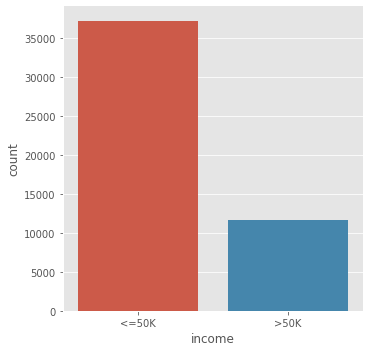

In [ ]:
sns.catplot(x='income',kind='count',data=df,orient="h");

**Distribuição das classes por Nível de Escolaridade**

Destaque para *HS-grad*, *Some-college* e *Bachelors*.

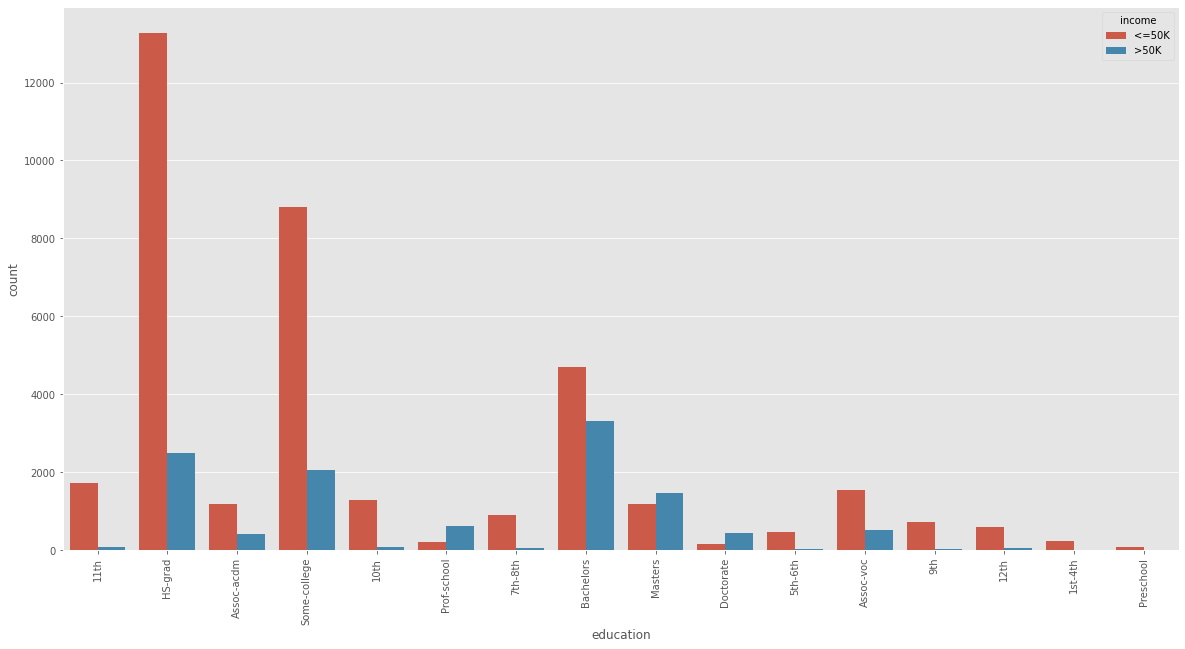

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x = 'education',  hue = 'income')
plt.xticks(rotation=90);

**Distribuição das classes (variável 'education')**

Como visto acima as três maiaores classes são:

HS-grad, Some-college e Bachelors


In [ ]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

**Verificando a menor e a maior jornada de trabalho**

In [ ]:
print(df['hours-per-week'].min())
print(df['hours-per-week'].max())

1
99


**Quantidade de valores únicos em 'hours-per-week'**

In [ ]:
len(df['hours-per-week'].unique())

96

**Valores únicos em 'hours-per-week'**

In [ ]:
df['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

Veja a dificuldade em visualizar a coluna 'hours-per-week'.

In [ ]:
hour=pd.DataFrame(df['hours-per-week'].value_counts())
hour.reset_index(inplace=True)
hour.columns=(['valores','horas'])
list(hour.values)

[array([   40, 22803]),
 array([  50, 4246]),
 array([  45, 2717]),
 array([  60, 2177]),
 array([  35, 1937]),
 array([  20, 1862]),
 array([  30, 1700]),
 array([  55, 1051]),
 array([ 25, 958]),
 array([ 48, 770]),
 array([ 38, 714]),
 array([ 15, 623]),
 array([ 70, 437]),
 array([ 10, 425]),
 array([ 32, 423]),
 array([ 65, 355]),
 array([ 24, 354]),
 array([ 42, 338]),
 array([ 36, 336]),
 array([ 44, 310]),
 array([ 16, 303]),
 array([ 12, 247]),
 array([ 37, 242]),
 array([ 43, 227]),
 array([  8, 218]),
 array([ 80, 210]),
 array([ 52, 205]),
 array([ 56, 141]),
 array([ 28, 140]),
 array([ 99, 137]),
 array([ 18, 129]),
 array([ 46, 129]),
 array([ 72, 107]),
 array([ 75, 105]),
 array([ 5, 95]),
 array([ 6, 92]),
 array([ 4, 84]),
 array([47, 82]),
 array([84, 72]),
 array([39, 63]),
 array([22, 62]),
 array([54, 62]),
 array([33, 61]),
 array([41, 59]),
 array([ 3, 59]),
 array([14, 55]),
 array([ 2, 53]),
 array([34, 48]),
 array([21, 46]),
 array([ 7, 45]),
 array([27, 43

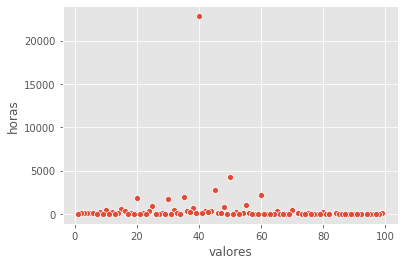

In [ ]:
sns.scatterplot(data=hour, x='valores',y='horas');

**Discretizando os dados**

Veja que mesmo com a contagem de valores a visualização está bem ruim, por isso é interessante dividir por categorias.

O único insight que podemos tirar desses gráficos é que há apenas um valor em horas de trabalho que realmente é expressivo. 40h semanais com 15217 contagens.

Além de que, isso não nos mostra nada em relação ao valor final.

Na verdade, se houvesse a intenção de entender algo em relação a essa distribuição, poderiamos utilizar apenas partes dos dados, mas na verdade o que queremos é entender como se relaciona com os valores trabalhados por horas. 

Pra isso será feita uma categorização (discretização ou binarização) dos dados e todos esses 94 dados serão divididos em 3 categorias, que serão:

* 0-30 (jornada curta)
* 30-40 (jornada normal)
* 40-100 (jornada extra)

Você pode saber mais sobre esse e outros processamentos [aqui](https://bit.ly/2Siq0YU).

In [ ]:
df['hours-per-week'] = pd.cut(df['hours-per-week'],[0,30,40,100], labels =['short','normal','extra'])

**Distribuição das classes por Horas trabalhadas**

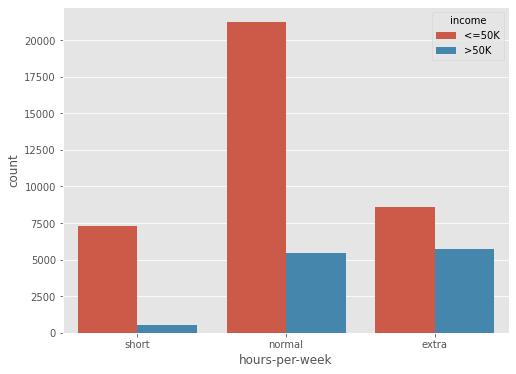

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'hours-per-week',  hue = 'income');

**Agora vamos verificar a nova distribuição com os dados já discretizados**

In [ ]:
df['hours-per-week'].value_counts()

normal    26639
extra     14352
short      7851
Name: hours-per-week, dtype: int64

**Distribuição das classes de acordo com a ocupação**

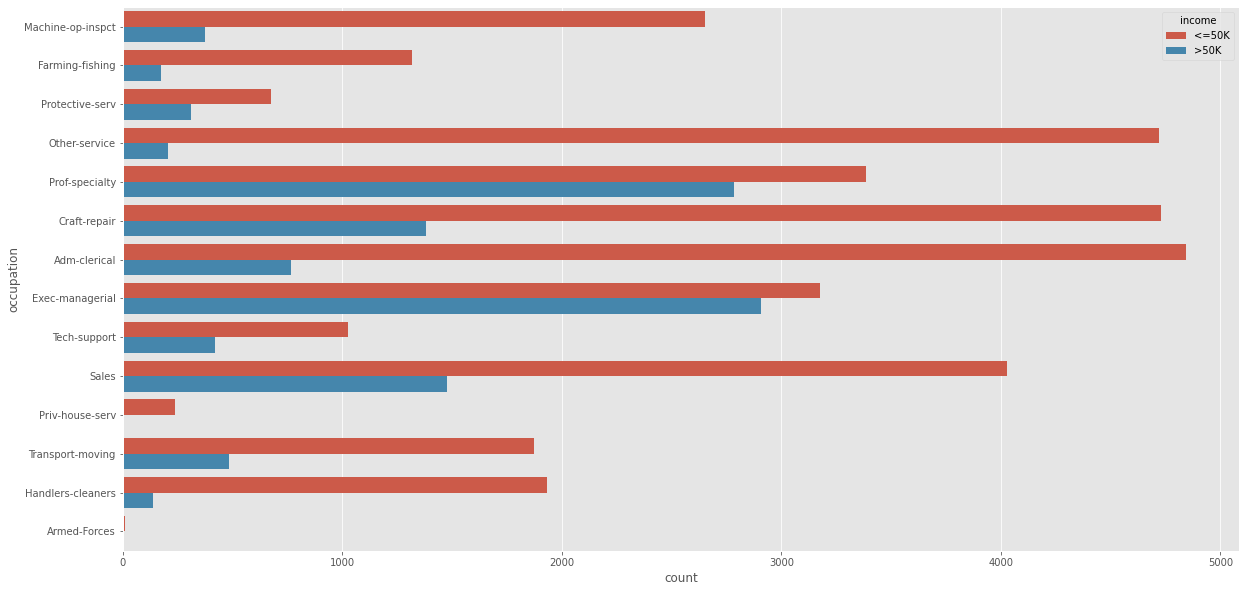

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, y = 'occupation',  hue = 'income');

**Distribuição da variável 'occupation'**

In [ ]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

**Correlação entre variáveis 'sex' e 'income'**

Veja que tanto homens quanto mulheres estão abaixo dos 50k, contudo quando vemos pessoas que ganham acima desse valor há uma discrepância enorme, pois se os homens que ganham esse valor são cerca de 40 a 50% dos que ganham abaixo, as mulheres são muito mais abaixo, tanto em relação às mulheres e pior em relação aos homens.

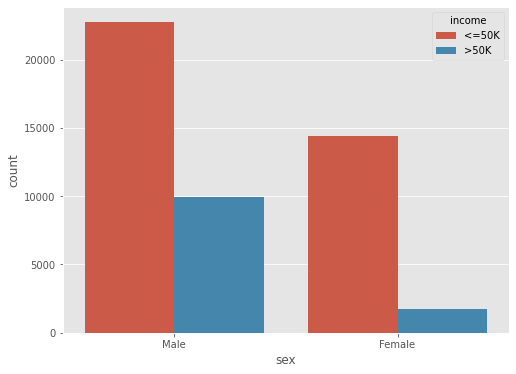

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="sex", hue='income', data=df);

**Correlação entre variáveis 'race' e 'income'**

Como, infelizmente não poderia ser diferente, a maioria empregada é da cor branca e também são eles, de longe, que ganham os maiores salários.

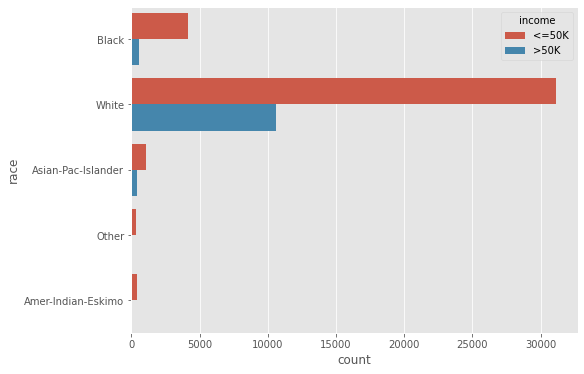

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y="race", hue='income', data=df);

**Verificando a idade mínima e máxima do dataset**

In [ ]:
# Verificando a idade mínima e máxima do dataset.
print(f'A idade mínima é: {df.age.min()} anos')
print(f'A idade máxima é: {df.age.max()} anos')

A idade mínima é: 17 anos
A idade máxima é: 90 anos


**Para uma melhor visualização**

Vamos agrupar as idades em 3 categorias:
* 0-25 anos (jovens)
* 25-50 anos (adultos)
* 50-100 anos (idosos)

Tal qual foi feito com a variável 'hours-per-week'

In [ ]:
df['age'] = pd.cut(df['age'],[0,25,50,100], labels =['young','adult','old'])

**Verificando como ficou a distribuição**

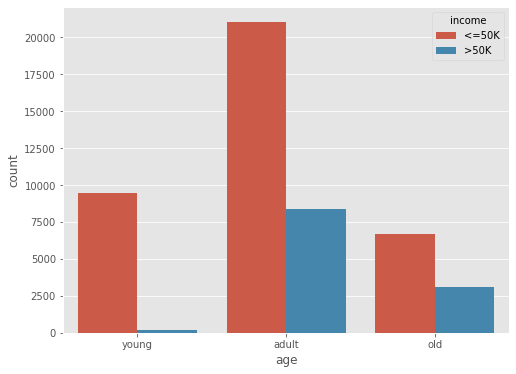

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x = 'age',  hue = 'income');

# 3. Substituindo os Valores Faltantes

**Verificando a quantidade de valores nulos no dataset**

In [ ]:
# criando a contagem dos valores faltantes por coluna
total = df.isnull().sum().sort_values(ascending=False)
# criando o percentual dos valores faltantes por coluna
percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
# criando dataframe
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
# visualizando somente os com percentual diferente de zero
missing_data[missing_data['percent']!=0]

,total,percent
occupation,2809,0.057512
workclass,2799,0.057307
native-country,857,0.017546


**Preenchendo os valores nulos da coluna 'workclass'**

In [ ]:
top = 'Private'
df['workclass'] = df['workclass'].fillna(top)

**Preenchendo os valores nulos da coluna 'occupation'**

In [ ]:
top = 'United-States'
df['occupation'] = df['occupation'].fillna(top)

**Preenchendo os valores nulos da coluna 'native-country'**

In [ ]:
top = 'Prof-specialty'
df['native-country'] = df['native-country'].fillna(top)

**Verificando se ainda existem valores nulos no Dataset**

In [ ]:
if df.isnull().sum().sort_values(ascending=False).any() != 0:
    print(f'Existem valores nulos no dataset? {True}')
else:
    print(f'Existem valores nulos no dataset? {False}')

Existem valores nulos no dataset? False


**Criando uma nova coluna com a renda final**

In [ ]:
df['capital_last'] = df['capital-gain'] - df['capital-loss']

**Criando função para remover as features sempre que necessário**


In [ ]:
def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)

**Removendo as primeiras features**

A coluna 'educational-num' está preenchida com o código referente a cada nível de escolaridade, dessa maneira podemos excluir a coluna 'education'.

As colunas 'capital-gain' e 'capital-loss' estão representadas pela nova coluna que criamos anteriormente.

In [ ]:
remove_features(['capital-gain','capital-loss','education'])

**Transformando as variáveis categóricas em numéricas**

In [ ]:
# selecionando apenas as colunas categóricas
cols = df[df.select_dtypes(['object']).columns]
# iterando sobre as colunas para transformar em numéricas com label encoder
for c in cols:
    encoding = LabelEncoder()
# transformando
    encoding.fit(list(df[c].values))
    df[c] = encoding.transform(list(df[c].values))
# aplicando o get_dummies
df = pd.get_dummies(df)

Se quiser saber mais sobre as técnicas utilizadas acima, clique [aqui](https://bit.ly/2Siq0YU).

In [ ]:
df.head(20)

,workclass,educational-num,marital-status,occupation,relationship,race,sex,native-country,income,capital_last,age_young,age_adult,age_old,hours-per-week_short,hours-per-week_normal,hours-per-week_extra
0,3,7,4,6,3,2,1,39,0,0,1,0,0,0,1,0
1,3,9,2,4,0,4,1,39,0,0,0,1,0,0,0,1
2,1,12,2,10,0,4,1,39,1,0,0,1,0,0,1,0
3,3,10,2,6,0,2,1,39,1,7688,0,1,0,0,1,0
4,3,10,4,14,3,4,0,39,0,0,1,0,0,1,0,0
5,3,6,4,7,1,4,1,39,0,0,0,1,0,1,0,0
6,3,9,4,14,4,2,1,39,0,0,0,1,0,0,1,0
7,5,15,2,9,0,4,1,39,1,3103,0,0,1,0,1,0
8,3,10,4,7,4,4,0,39,0,0,1,0,0,0,1,0
9,3,4,2,2,0,4,1,39,0,0,0,0,1,1,0,0


**Checando as correlações**

Isso possibilita a análise simultânea da associação entre variáveis.

Os números 1.00 são das variáveis com elas mesmas, logo 1.00 é a mais alta correlação positiva, ao passo que 0 não há correlação e -1 é a correlação negativa, ou seja, enquanto uma variável cresce a outra diminui na mesma proporção, enquanto uma desce, a outra sobe na mesma proporção.

A partir de 0.7, 0.8 pode ser considerada como alta correlação.

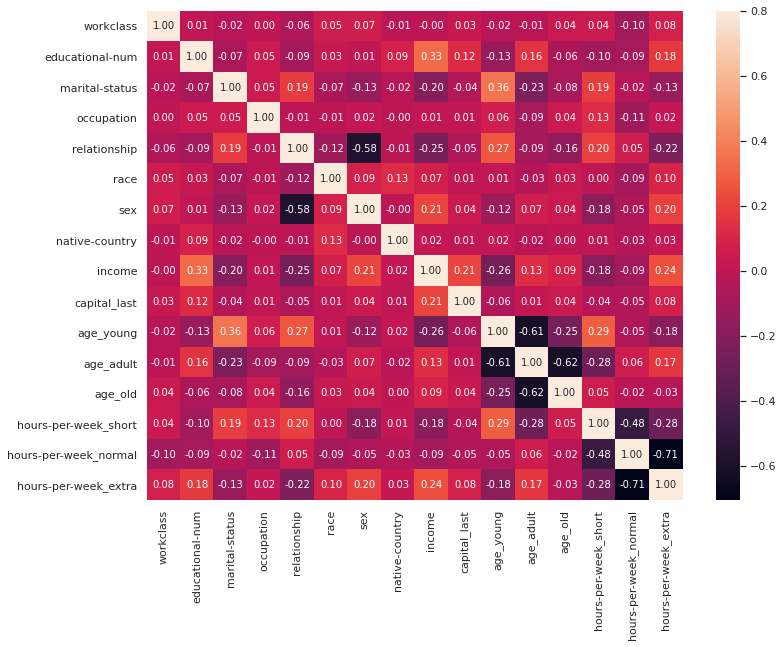

In [ ]:
corr = df.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f');

**Vamos verificar as correlações entre a variável 'income' e as demais variáveis.

In [ ]:
corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

educational-num          0.332613
hours-per-week_extra     0.243127
sex                      0.214628
capital_last             0.214356
age_adult                0.133381
age_old                  0.092733
race                     0.070934
native-country           0.020073
occupation               0.007275
workclass               -0.000511
hours-per-week_normal   -0.092061
hours-per-week_short    -0.176724
marital-status          -0.199072
relationship            -0.253214
age_young               -0.257496
Name: income, dtype: float64

# 4. Selecionando Features Importantes

**Separando a classe dos Dados**

In [ ]:
previsores = df.drop('income',axis=1)
classe = df['income']

**Criando classificador para visualizar as features mais importantes para o modelo**

Como falado [aqui](https://bit.ly/2Sg9LM7) os modelos de *Random Forest* e *Decision Tree* têm a vantagem de nos dá de uma forma clara quais features realmente importam para o modelo. 

Deste modo, podemos excluir do nosso modelo aquelas variáveis que não têm importância e que, no fim, acabam retirando um pouco da precisão do modelo.

Ainda que o algoritmo final não seja nenhum deles, extrair essas regras nos darão vantagem para qualquer modelo de Machine Learning.

In [ ]:
clf=RandomForestClassifier(n_estimators=100, random_state=12)
clf.fit(previsores, classe)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

**Visualizando as features mais importantes**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=previsores.columns).sort_values(ascending=False)
feature_imp

capital_last             0.229993
educational-num          0.181550
relationship             0.143937
marital-status           0.111794
occupation               0.111505
workclass                0.057890
native-country           0.036843
hours-per-week_extra     0.026942
age_young                0.024092
race                     0.023410
sex                      0.014092
hours-per-week_short     0.013292
age_adult                0.008313
hours-per-week_normal    0.008241
age_old                  0.008108
dtype: float64

**Visualizando graficamente as features mais importantes**

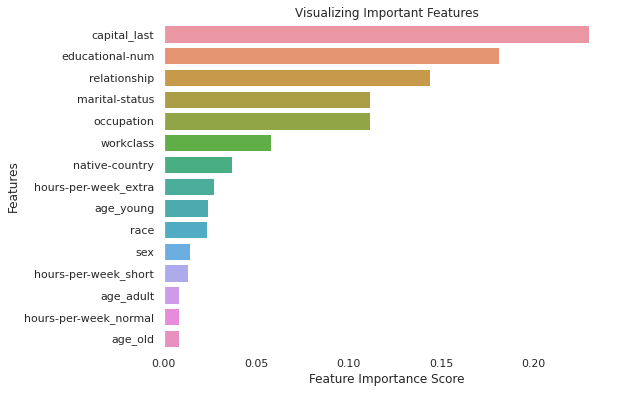

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**Selecionando as features de maior importância**

Aquelas acima de 3% de importância

In [ ]:
features_selected = []
for feature,importance in feature_imp.iteritems():
# iteritems retorna um iterador que nos permiter iterar sobre a chave ou valor
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

capital_last: 23%
educational-num: 18%
relationship: 14%
marital-status: 11%
occupation: 11%
workclass: 6%
native-country: 4%


# 5. Treinando Modelos de Machine Learning

**Treinando os modelos utilizando apenas as features selecionadas**

In [ ]:
previsores = df[features_selected]
classe = df['income']

**Criando modelo de Machine Learning a partir de cada algoritmo**

Os dados estão em diferentes escalas e isso pode prejudicar a performance de alguns algoritmos, logo deve-se aplicar a Padronização ao conjunto de dados (colocando-os na mesma escala). Veja mais sobre isso [aqui](https://bit.ly/2Siq0YU).
Nesta técnica, os dados serão transformados de modo que estejam com uma distribuição normal, com média igual a zero e
desvio padrão igual a 1.

<p><span style="color:red">Observação:</span></p> O modelo SVM não foi utilizado por não funcionar bem grandes conjuntos de dados, uma vez que o tempo de treinamento necessário é maior. 


In [ ]:
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
pipelines.append(('Scaled-DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
resultados = []
nomes = []

# Percorrendo cada um dos modelos e fazedo o cross validation
for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)
    cross_val_result = model_selection.cross_val_score(modelo, 
                                                     previsores, 
                                                     classe, 
                                                     cv = kfold, 
                                                     scoring = 'accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
# retornando a média das validações, bem como seu desvio padrão
    texto = "%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.817616 (0.005746)
Scaled-KNN: 0.838131 (0.004623)
Scaled-NB: 0.802588 (0.003415)
Scaled-DT: 0.853753 (0.004910)
Scaled-RF: 0.856927 (0.003957)


**Visualizando o objeto pipelines**

In [ ]:
pipelines

[('Scaled-LR', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LR',
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='auto', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      solver='lbfgs', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)), ('Scaled-KNN', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('KNN',
                   KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                        metric='minkowski', m

**Visualizando os melhores algoritmos via boxplot**

De acordo com os resultados anteriores, os modelos criados com DecisionTree e Random Forest apresentaram os melhores valores de acurácia e conseguinte os melhores resultados.

O gráfico de Caixas ou BoxPlot nos ajudará a visualizar isso melhor.

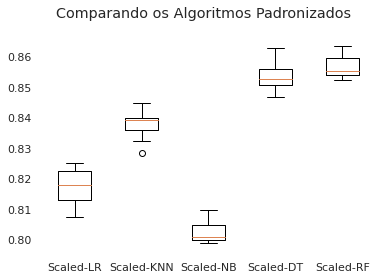

In [ ]:
fig = plt.figure()
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# 6. Fazendo Tuning do Modelo

Embora o Random Forest tenha apresentado o menor erro após a padronização dos dados, pode-se ainda otimizá-lo com o ajuste dos seus parâmetros.

Faremos a mesma coisa como o algoritmo Decision Tree.

**Random Forest**

In [ ]:
# # Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Possíveis valores de estimators
val_estimators = [20, 50, 100, 150, 200]

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

# Definindo um dicionário que recebe as listas de parâmetros e valores
parametros_grid = dict(n_estimators = val_estimators,
                       criterion = val_criterion)
                      
                       
# Criando o modelo
modelo_random = RandomForestClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferentes combinações com os parâmetros
grid = RandomizedSearchCV(estimator = modelo_random, param_distributions = parametros_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.85762,std:0.00317,params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.85715,std:0.00444,params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.85746,std:0.00365,params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.85713,std:0.00353,params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.85693,std:0.00379,params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.85564,std:0.0035,params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.85742,std:0.0038,params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.85779,std:0.00346,params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.85709,std:0.00314,params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.85732,std:0.00302,params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 100, 'criterion': 'entropy'}, Score:0.8577864008979669


**Por que o Randomize?**

O ``GridSearchCV`` é mais eficiente pois faz a combinação de todos os hiperparâmetros, contudo isso é muito custoso em termos de poder computacional e de tempo.

O ``RandomizeSearchCV`` contrasta isso por configurar uma grade de valores de hiperparâmetros e seleciona combinações aleatórias para treinar o modelo e a retornar seus scores.

**DecisionTree**

In [ ]:
# Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Definindo a profundidade máxima da árvore.
max_depth = list(range(1, 31))

# Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']


# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth)

# Criando o modelo
tree = DecisionTreeClassifier()

# Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=12)

# Testando diferenets combinações com os valores de K
grid = RandomizedSearchCV(estimator = tree, param_distributions = valores_grid, cv = kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

# Print do resultado  
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)

for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print(f'mean:{mean},std:{std},params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores on development set:
mean:0.85525,std:0.00481,params:{'max_depth': 19, 'criterion': 'gini'}
mean:0.83918,std:0.00434,params:{'max_depth': 3, 'criterion': 'gini'}
mean:0.85582,std:0.00499,params:{'max_depth': 18, 'criterion': 'gini'}
mean:0.85422,std:0.00397,params:{'max_depth': 24, 'criterion': 'entropy'}
mean:0.85828,std:0.00344,params:{'max_depth': 13, 'criterion': 'gini'}
mean:0.85537,std:0.00449,params:{'max_depth': 21, 'criterion': 'gini'}
mean:0.85406,std:0.00399,params:{'max_depth': 26, 'criterion': 'entropy'}
mean:0.85791,std:0.00353,params:{'max_depth': 10, 'criterion': 'gini'}
mean:0.85662,std:0.00346,params:{'max_depth': 20, 'criterion': 'entropy'}
mean:0.85408,std:0.00507,params:{'max_depth': 30, 'criterion': 'gini'}

Melhor parâmetro:{'max_depth': 13, 'criterion': 'gini'}, Score:0.8582778013893675


Veja que, por muito pouco, após a otimização dos parâmetros o **DecisionTree** se saiu melhor.

# 7. Preparando a Versão Final do Modelo

In [ ]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
modelo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=12)
modelo_tree.fit(previsores,classe)
result_tree = cross_val_predict(modelo_tree,previsores, classe, cv=10)

print(f'Acurácia: {accuracy_score(classe,result_tree)}')
print('\n',confusion_matrix(classe,result_tree))
print('\n',classification_report(classe,result_tree))

Acurácia: 0.8584619794439212

 [[35043  2112]
 [ 4801  6886]]

               precision    recall  f1-score   support

           0       0.88      0.94      0.91     37155
           1       0.77      0.59      0.67     11687

    accuracy                           0.86     48842
   macro avg       0.82      0.77      0.79     48842
weighted avg       0.85      0.86      0.85     48842



# 8. Persistindo o Modelo em Disco

**Persistindo com Pickle**

In [ ]:
#filename = 'model_final.sav'
pickle.dump(modelo_tree, open('modelo.sav', 'wb'))
pickle.load(open('modelo.sav', 'rb'))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

**Persistindo com Joblib**

In [ ]:
dump(modelo_tree,'modelo.pkl')

['modelo.pkl']

**Carregando o modelo**

In [ ]:
from joblib import load
model=load('modelo.pkl')

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>